In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#again the plot size
sns.set(rc={'figure.figsize':(10,8)})
#chanage the bgcolor to white
sns.set_style("white")
#make the legend and axis text a bit bigger
sns.set_context("talk")
#remove the axis splines
sns.despine()

<Figure size 720x576 with 0 Axes>

In [3]:
letter_frequency_dict = {'E' : 12.0,'T' : 9.10,'A' : 8.12,'O' : 7.68,'I' : 7.31,'N' : 6.95,'S' : 6.28,'R' : 6.02,'H' : 5.92,'D' : 4.32,'L' : 3.98,'U' : 2.88,'C' : 2.71,'M' : 2.61,'F' : 2.30,'Y' : 2.11,'W' : 2.09,'G' : 2.03,'P' : 1.82,'B' : 1.49,'V' : 1.11,'K' : 0.69,'X' : 0.17,'Q' : 0.11,'J' : 0.10,'Z' : 0.07 }

In [4]:
letter_frequency_df = pd.DataFrame(letter_frequency_dict.items(), columns=['letter', 'frequency'])

In [5]:
letter_frequency_df['frequency'] = pd.to_numeric(letter_frequency_df['frequency'])
letter_frequency_df['letter'] = letter_frequency_df['letter'].str.lower()

In [6]:
letter_frequency_df.head()

,letter,frequency
0,e,12.00
1,t,9.10
2,a,8.12
3,o,7.68
4,i,7.31


In [7]:
#reading data from the txt file
names_df = pd.read_csv('nationalities.txt', header=None, names=["nationality"])

In [8]:
virus = pd.DataFrame(['corona'], columns = ['nationality'])
names_df = pd.concat([virus, names_df], ignore_index = True)
names_df['nationality'] = names_df['nationality'].str.lower() + " virus"

In [9]:
names_df.head()

,nationality
0,corona virus
1,afghan virus
2,albanian virus
3,algerian virus
4,american virus


In [10]:
def compute_possibility(name):
    name = name.replace(' ', '')
    cumulative_frequency = 0
    for c in name:
        frequency = float(letter_frequency_df['frequency'].loc[letter_frequency_df['letter'] == c])
        #print(str(c)+' '+str(frequency))
        cumulative_frequency = cumulative_frequency + frequency
        word_frequency = cumulative_frequency / len(name)
    return word_frequency

In [11]:
compute_possibility('american virus')

5.9569230769230765

In [12]:
names_df['possibility'] = names_df['nationality'].apply(compute_possibility)

In [13]:
names_df.head()

,nationality,possibility
0,corona virus,5.705455
1,afghan virus,5.185455
2,albanian virus,5.741538
3,algerian virus,6.010000
4,american virus,5.956923


In [14]:
names_df = names_df.sort_values(by='possibility', ascending=False)

In [15]:
names_df.head(10)

,nationality,possibility
53,east timorese virus,7.182353
103,liechtensteiner virus,7.161500
158,sierra leonean virus,7.057222
155,senegalese virus,7.016000
58,eritrean virus,7.009231
174,taiwanese virus,6.826429
8,argentinean virus,6.821875
22,beninese virus,6.813846
59,estonian virus,6.768462
192,yemenite virus,6.744615


In [16]:
names_df.tail(10)

,nationality,possibility
52,dutch virus,4.853000
17,barbudan virus,4.845385
124,mozambican virus,4.751333
170,swazi virus,4.747000
48,czech virus,4.701000
187,uruguayan virus,4.685000
184,us virus,4.680000
46,cuban virus,4.575000
188,uzbek virus,4.073000
97,kyrgyz virus,3.330000


In [17]:
letter_frequency_df = letter_frequency_df.sort_values(by='letter', ascending=True)

In [18]:
letter_frequency_df.head()

,letter,frequency
2,a,8.12
19,b,1.49
12,c,2.71
9,d,4.32
0,e,12.00


<Figure size 720x576 with 0 Axes>

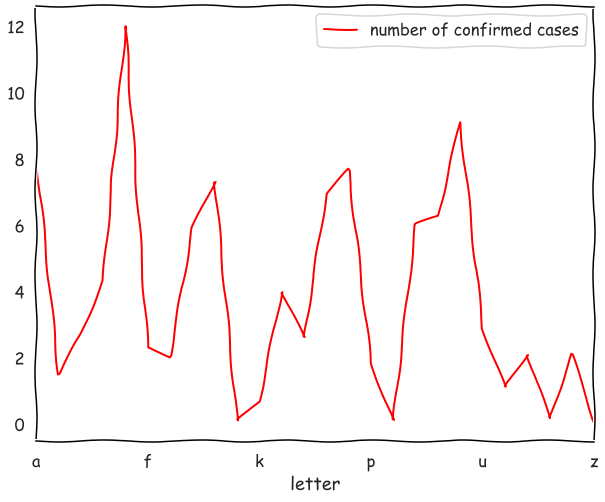

In [19]:
plt.xkcd()
plt.figure()
#plotting two line plots for deaths and recoveries respectively

label = 'number of confirmed cases'
#colors = ['red', 'orange', 'yellowgreen', 'green']

letter_frequency_df.plot(x = 'letter', y = 'frequency', label = label, color = 'red')

#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fancybox=True)
plt.show()